# Experiments with IBP posterior, with simplified data



Lets start with the finite model.  The vision, my vision, is I'm going to use projection, to visualize what is happening somehow.  So, we will start with eg 5 data points, since those wont affect the dimensionality of such projections, I hope/think.

Edit: so, at this point, I started to make a library to handle projection, and wrote notebook at [test_bases.ipynb](test_bases.ipynb), to test this, but it turns out that QR projection is all we need basically, using $\mathbf{Q}^T$ as the projection matrix, and $\mathbf{Q}$ is an orthonormal basis matrix for the span of the column space of $\mathbf{X}$.  The notebook was interesting to create, and I learned a lot.

A_gt [[-1.0856306]]
Z_gt [[0]
 [0]
 [0]
 [1]
 [1]]
ZA_gt [[ 0.       ]
 [ 0.       ]
 [ 0.       ]
 [-1.0856306]
 [-1.0856306]]
X [[ 0.09973454]
 [ 0.15213608]
 [-0.00482499]
 [-0.92610049]
 [-1.26394003]]
ZQ_gt
 [[ 0.        ]
 [-0.        ]
 [-0.        ]
 [-0.70710678]
 [-0.70710678]]
ZR_gt
 [[-1.41421356]]
ZQ_gt.T.dot(Z_gt) [[-1.41421356]]
ZQ_gt.T.dot(X) [[ 1.54859251]]
scaled_max_range 3.3


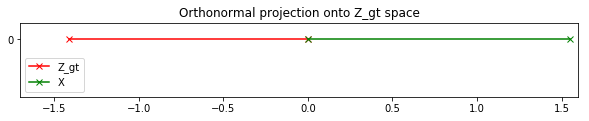

In [64]:
import numpy as np
import math
import mylib
import importlib
importlib.reload(mylib)
import matplotlib.pyplot as plt


N = 5  # number data points
K = 1  # number possible features
D = 1  # number of dimensions in each x sample

sigma_A = 1
sigma_X = 0.1

# use _gt postfix to denote 'ground truth'

np.random.seed(123)
A_gt = np.random.randn(K, D) * sigma_A
print('A_gt', A_gt)

Z_gt = np.random.choice(2, size=(N, K))
print('Z_gt', Z_gt)

ZA_gt = Z_gt.dot(A_gt)
print('ZA_gt', ZA_gt)

X = ZA_gt + np.random.randn(N, D) * sigma_X
print('X', X)


ZQ_gt, ZR_gt = np.linalg.qr(Z_gt)
print('ZQ_gt\n', ZQ_gt)
print('ZR_gt\n', ZR_gt)

print('ZQ_gt.T.dot(Z_gt)', ZQ_gt.T.dot(Z_gt))
print('ZQ_gt.T.dot(X)', ZQ_gt.T.dot(X))
mylib.proportional_axes(xlim=[-1.7, 1.6], ylim=[-0.35, 0.1])
plt.plot([0, ZQ_gt.T.dot(Z_gt)], [0, 0], 'r-x', label='Z_gt')
plt.plot([0, ZQ_gt.T.dot(X)], [0, 0], 'g-x', label='X')
# plt.plot([0], ZQ_gt.T.dot(Z_gt))
# mylib.plot_vector(ZQ_gt.T.dot(Z_gt))
# mylib.plot_vector(ZQ_gt.T.dot(X))
plt.title('Orthonormal projection onto Z_gt space')
plt.legend()
plt.show()

ZcatX [[ 0.          0.09973454]
 [ 0.          0.15213608]
 [ 0.         -0.00482499]
 [ 1.         -0.92610049]
 [ 1.         -1.26394003]]
ZcatX_Q [[ 0.         -0.33211022]
 [-0.         -0.50660429]
 [-0.          0.01606693]
 [-0.70710678 -0.562493  ]
 [-0.70710678  0.562493  ]]
scaled_max_range 3.3


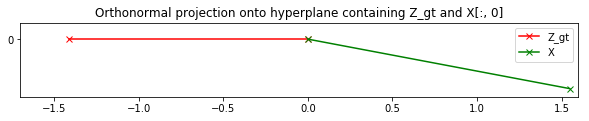

In [65]:
import mylib
import importlib
importlib.reload(mylib)

# ZcatX = np.concatenate((X, Z_gt), axis=1)
ZcatX = np.concatenate((Z_gt, X), axis=1)
print('ZcatX', ZcatX)
ZcatX_Q, _ = np.linalg.qr(ZcatX)
print('ZcatX_Q', ZcatX_Q)
mylib.proportional_axes(xlim=[-1.7, 1.6], ylim=[-0.35, 0.1])
mylib.plot_vector(ZcatX_Q.T.dot(Z_gt), 'r-x', label='Z_gt')
mylib.plot_vector(ZcatX_Q.T.dot(X), 'g-x', label='X')
# mylib.plot_vector(ZcatX_Q.T.dot(X[:, 1]))b
plt.legend()
plt.title('Orthonormal projection onto hyperplane containing Z_gt and X[:, 0]')
plt.show()


scaled_max_range 3.3


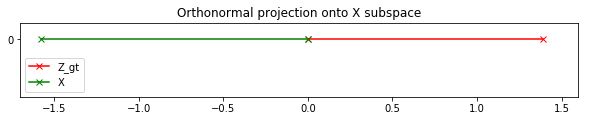

In [66]:
XQ, _ = np.linalg.qr(X)

mylib.proportional_axes(xlim=[-1.7, 1.6], ylim=[-0.35, 0.1])
plt.plot([0, XQ.T.dot(Z_gt)], [0, 0], 'r-x', label='Z_gt')
plt.plot([0, XQ.T.dot(X)], [0, 0], 'g-x', label='X')
plt.title('Orthonormal projection onto X subspace')
plt.legend()
plt.show()

Z_gt.T.dot(Z_gt)
 [[2]]
Z_gt.dot(Z_gt.T)
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 1]
 [0 0 0 1 1]]
scaled_max_range 4.6


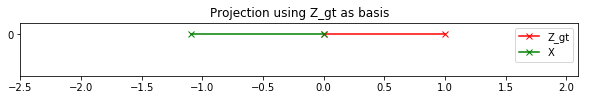

In [97]:
print('Z_gt.T.dot(Z_gt)\n', Z_gt.T.dot(Z_gt))
print('Z_gt.dot(Z_gt.T)\n', Z_gt.dot(Z_gt.T))
# print('np.linalg.inv(Z_gt)', np.linalg.inv(Z_gt))
Z_gt_linv = np.linalg.solve(Z_gt.T.dot(Z_gt), Z_gt.T)
mylib.proportional_axes(xlim=[-2.5, 2.1], ylim=[-0.35, 0.1])
plt.plot([0, Z_gt_linv.dot(Z_gt)], [0, 0], 'r-x', label='Z_gt')
plt.plot([0, Z_gt_linv.dot(X)], [0, 0], 'g-x', label='X')
plt.title('Projection using Z_gt as basis')
plt.legend()
plt.show()

Same as previous graph, just the scaling is different.

ZcatX [[ 0.1    0.   ]
 [ 0.152  0.   ]
 [-0.005  0.   ]
 [-0.926  1.   ]
 [-1.264  1.   ]]
ZcatX.shape (5, 2)
ZcatX_linv [[ 1.106  1.687 -0.054  1.873 -1.873]
 [ 1.211  1.847 -0.059  2.551 -1.551]]
ZcatX_linv.dot(ZcatX) [[ 1.  0.]
 [ 0.  1.]]


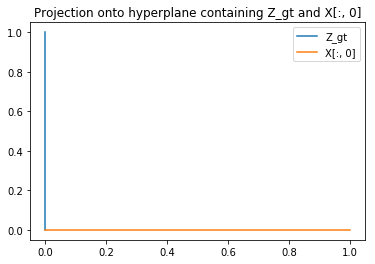

In [95]:
ZcatX = np.concatenate((X, Z_gt), axis=1)
print('ZcatX', ZcatX)
print('ZcatX.shape', ZcatX.shape)
ZcatX_linv = np.linalg.solve(ZcatX.T.dot(ZcatX), ZcatX.T)
print('ZcatX_linv', ZcatX_linv)
print('ZcatX_linv.dot(ZcatX)', ZcatX_linv.dot(ZcatX))
mylib.plot_vector(ZcatX_linv.dot(Z_gt), label='Z_gt')
mylib.plot_vector(ZcatX_linv.dot(X[:, 0]), label='X[:, 0]')
# mylib.plot_vector(ZcatX_Q.T.dot(X[:, 1]))
plt.legend()
plt.title('Projection onto hyperplane containing Z_gt and X[:, 0]')
plt.show()


Ok, logical: since each vector is one basis, so one  goes to $(1, 0)$, and the other goes to $(0, 1)$ :-P

Try changing $Z$, and see what happens.

Z_flipped
 [[0]
 [0]
 [0]
 [1]
 [1]]
ZcatX [[ 0.1    0.   ]
 [ 0.152  0.   ]
 [-0.005  0.   ]
 [-0.926  1.   ]
 [-1.264  1.   ]]
ZcatX_Q [[-0.063 -0.326]
 [-0.096 -0.497]
 [ 0.003  0.016]
 [ 0.587 -0.687]
 [ 0.801  0.418]]
scaled_max_range 3.3


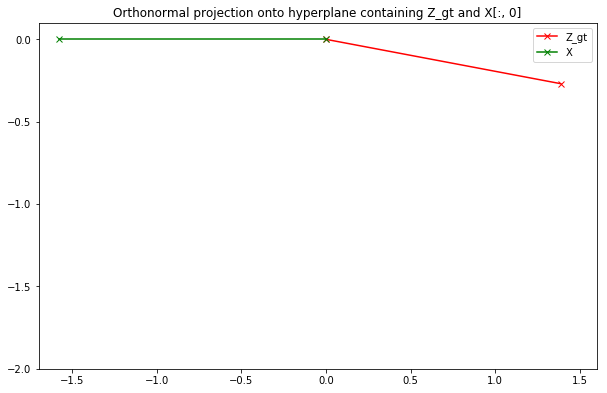

Z_flipped
 [[1]
 [0]
 [0]
 [1]
 [1]]
ZcatX [[ 0.1    1.   ]
 [ 0.152  0.   ]
 [-0.005  0.   ]
 [-0.926  1.   ]
 [-1.264  1.   ]]
ZcatX_Q [[-0.063 -0.972]
 [-0.096 -0.115]
 [ 0.003  0.004]
 [ 0.587 -0.199]
 [ 0.801  0.055]]
scaled_max_range 3.3


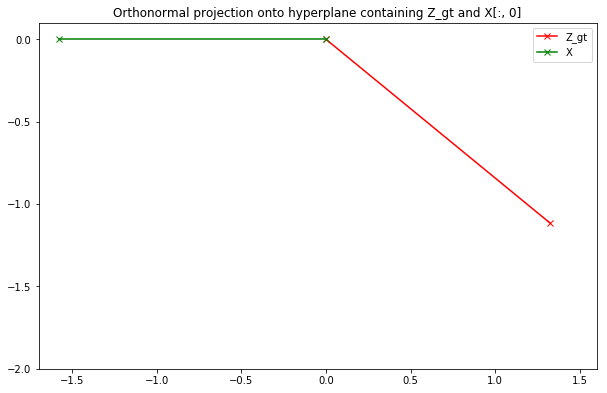

Z_flipped
 [[1]
 [1]
 [0]
 [1]
 [1]]
ZcatX [[ 0.1    1.   ]
 [ 0.152  1.   ]
 [-0.005  0.   ]
 [-0.926  1.   ]
 [-1.264  1.   ]]
ZcatX_Q [[-0.063 -0.683]
 [-0.096 -0.709]
 [ 0.003  0.002]
 [ 0.587 -0.177]
 [ 0.801 -0.01 ]]
scaled_max_range 3.3


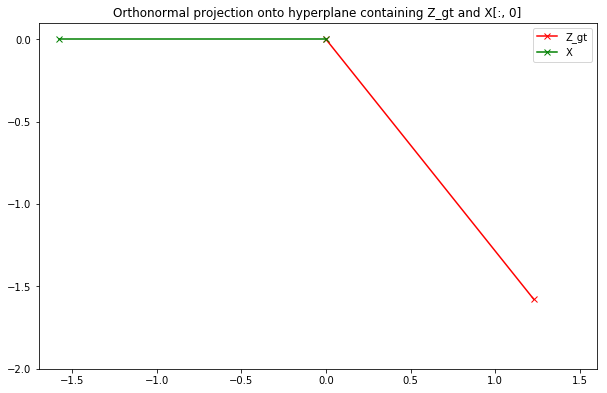

Z_flipped
 [[1]
 [1]
 [1]
 [1]
 [1]]
ZcatX [[ 0.1    1.   ]
 [ 0.152  1.   ]
 [-0.005  1.   ]
 [-0.926  1.   ]
 [-1.264  1.   ]]
ZcatX_Q [[-0.063 -0.578]
 [-0.096 -0.599]
 [ 0.003 -0.534]
 [ 0.587 -0.148]
 [ 0.801 -0.007]]
scaled_max_range 3.3


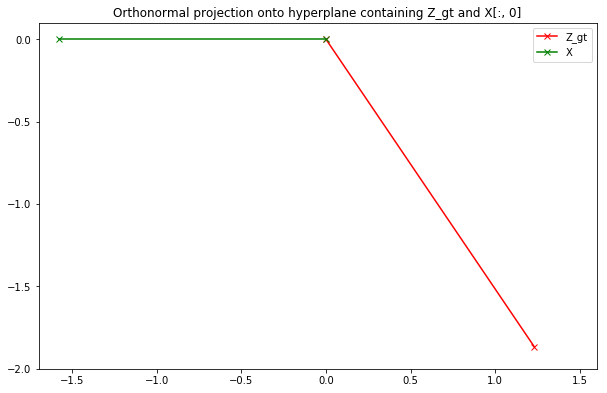

Z_flipped
 [[1]
 [1]
 [1]
 [0]
 [1]]
ZcatX [[ 0.1    1.   ]
 [ 0.152  1.   ]
 [-0.005  1.   ]
 [-0.926  0.   ]
 [-1.264  1.   ]]
ZcatX_Q [[-0.063 -0.55 ]
 [-0.096 -0.561]
 [ 0.003 -0.527]
 [ 0.587  0.2  ]
 [ 0.801 -0.255]]
scaled_max_range 3.3


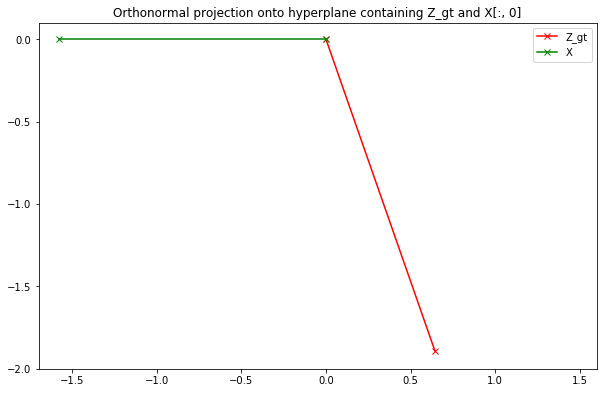

Z_flipped
 [[1]
 [1]
 [1]
 [0]
 [0]]
ZcatX [[ 0.1    1.   ]
 [ 0.152  1.   ]
 [-0.005  1.   ]
 [-0.926  0.   ]
 [-1.264  0.   ]]
ZcatX_Q [[-0.063 -0.574]
 [-0.096 -0.571]
 [ 0.003 -0.58 ]
 [ 0.587 -0.053]
 [ 0.801 -0.073]]
scaled_max_range 3.3


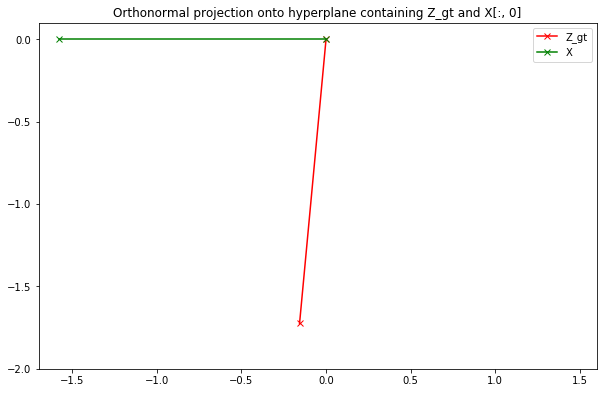

In [103]:
import mylib
import importlib
importlib.reload(mylib)

for num_Z_flips in range(N + 1):
    Z_flipped = np.copy(Z_gt)
    for n in range(num_Z_flips):
        Z_flipped[n] = 1 - Z_flipped[n]
    print('Z_flipped\n', Z_flipped)
    # ZcatX = np.concatenate((X, Z_gt), axis=1)
    ZcatX = np.concatenate((X, Z_flipped), axis=1)
    print('ZcatX', ZcatX)
    ZcatX_Q, _ = np.linalg.qr(ZcatX)
    print('ZcatX_Q', ZcatX_Q)
    mylib.proportional_axes(xlim=[-1.7, 1.6], ylim=[-2, 0.1])
    mylib.plot_vector(ZcatX_Q.T.dot(Z_flipped), 'r-x', label='Z_gt')
    mylib.plot_vector(ZcatX_Q.T.dot(X), 'g-x', label='X')
    # mylib.plot_vector(ZcatX_Q.T.dot(X[:, 1]))b
    plt.legend()
    plt.title('Orthonormal projection onto hyperplane containing Z_gt and X[:, 0]')
    plt.show()

Just plot x, z vs n:

X
 [[ 0.1  ]
 [ 0.152]
 [-0.005]
 [-0.926]
 [-1.264]]
Z_gt
 [[0]
 [0]
 [0]
 [1]
 [1]]


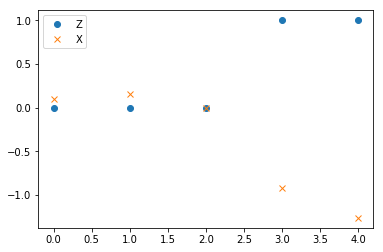

In [112]:
print('X\n', X)
print('Z_gt\n', Z_gt)
plt.plot(np.arange(N), Z_gt, 'o', label='Z')
plt.plot(np.arange(N), X, 'x', label='X')
plt.legend()
plt.show()